# 4.0 Knn

## Import libraries

In [93]:
# Sirve para actualizar el modulo despues de haber cambiado algo en el codigo de los modulos importados
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_objective, plot_histogram, plot_evaluations
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler

In [95]:
# Modulos propios del proyecto que se encuentran en el directorio src
from src.utils.paths import data_dir
from src.visualization.word_cloud import words_cloud
from src.utils.paths import references_dir
from src.utils.metrics import display_and_plot_all_metrics, calculate_metrics


## Set up

In [96]:
# Configuracion de opciones

# Configuramos para que muestre siempre todas las columnas disponibles
pd.options.display.max_columns = None

# Cambio del tamaño de los plots para seaborn
sns.set(rc={'figure.figsize':(10,5)})

# Definimos el color para los plots
COLOR_VINO_TINTO = "#7C3030"
COLOR__VINO_BLANCO = "#ffffbf"

## Read Data

In [97]:
# Obtenemos la ruta de los csv's que vamos a utilizar
WINES_FINAL_CSV_PATH = data_dir("processed", "df_wine_complete.csv")

print(f"{WINES_FINAL_CSV_PATH}")

c:\Users\cvigo\data-projects\proyecto-final-vinos\vinos-corderhouse\data\processed\df_wine_complete.csv


In [98]:
df_wines = pd.read_csv(WINES_FINAL_CSV_PATH)

In [99]:
df_wines.sample(10)

,quality_high,body_2,body_3,body_4,body_5,style_red,style_white,region_Otras,region_Priorato,region_Rias Baixas,region_Ribera del Duero,region_Rioja,region_Toro,region_Vino de Espana,PC1,PC2,PC3,PC4,PC5,PC6,PC7
4329,1,0,0,1,0,0,1,0,0,0,0,1,0,0,-0.006859,-0.480893,-0.001669,0.112049,0.103485,0.544540,0.041662
4830,1,0,0,1,0,0,1,0,1,0,0,0,0,0,-0.069911,-0.414751,-0.216417,-0.136625,-0.090170,-0.011737,-0.069707
5392,1,0,1,0,0,0,1,0,0,1,0,0,0,0,-0.500012,0.152163,-0.058076,0.153909,-0.064776,0.115016,-0.037098
5723,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0.081303,-0.636989,-0.128110,-0.011406,0.178242,0.130500,-0.074255
4538,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0.187980,-0.398168,0.224987,-0.336937,-0.163889,0.025963,0.202445
1460,0,0,0,1,0,0,1,0,1,0,0,0,0,0,-0.033773,0.975299,-0.202897,-0.232817,0.180739,0.183215,0.280241
4951,0,0,1,0,0,0,1,1,0,0,0,0,0,0,-0.680680,0.240433,-0.115895,0.039762,0.087272,-0.036723,0.060838
2973,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0.116835,-0.405331,0.064841,-0.058844,0.196060,-0.030886,-0.019859
290,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0.779740,0.742089,0.259530,-0.106519,-0.179235,-0.179544,-0.060827
5560,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0.076710,-0.286280,-0.142148,-0.091707,-0.080255,-0.073946,-0.039916


In [100]:
df_wines[[ "body_2", "quality_high"]]

,body_2,quality_high
0,0,0
1,0,1
2,0,0
3,0,1
4,0,1
...,...,...
6062,0,1
6063,0,0
6064,0,1
6065,0,1


# Preparamos los datos

In [101]:
#Seperamos en X e y
#Elimino de mi dataset la variable a predecir
X = df_wines.drop(columns=["quality_high"])
y = df_wines.quality_high #Defino el Target

In [102]:
# Me quedo con 30% para test (validación) y 70% para train (entrenamiento)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 
X_train.shape, X_test.shape

((4246, 20), (1821, 20))

# KNN

In [103]:
knn = KNeighborsClassifier(n_neighbors=3)
y_train_pred = knn.fit(X_train,y_train) 

In [104]:
y_test_pred = knn.predict(X_test) #Prediccion en Test

## Metricas

In [105]:
# Calculo las metricas de evaluacion
metrics_knn = calculate_metrics('knn', knn,X_test,y_test,y_test_pred)
metrics

,knn
accuracy,0.68
precision,0.73
recall,0.77
f1,0.75
roc_auc,0.69
fpr,"[0.0, 0.16591251885369532, 0.49019607843137253..."
tpr,"[0.0, 0.4378238341968912, 0.7728842832469776, ..."
thresholds,"[2.0, 1.0, 0.6666666666666666, 0.3333333333333..."


# Metricas: 

### Metricas calculadas

,recall,f1,precision,roc_auc,accuracy
knn,0.77,0.75,0.73,0.69,0.68


### Grafico de confusion matrix: 

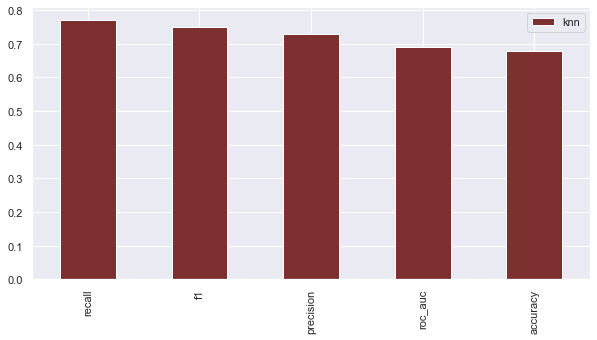

<Figure size 720x720 with 0 Axes>

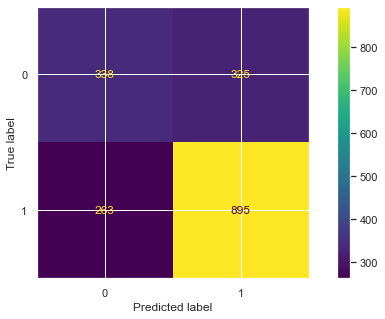

### Grafico de roc: 

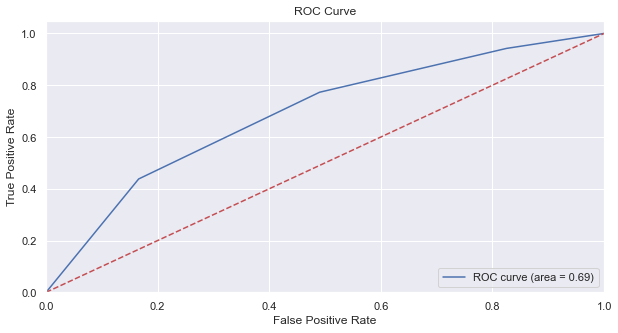

In [106]:
display_and_plot_all_metrics('knn', knn,X_test,y_test,y_test_pred)

# Hypertuning de Parámetros

En las metricas vamos a priorizar la metrica de precision ya que queremos reducir los falsos positivos porque eso implica que lso vinos de baja calidad sean clasificados como de baja calidad, y cuando se exporten puede generar malestar en los clientes y baja fidelidad.

In [107]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors)
model = BayesSearchCV(KNeighborsClassifier(),
                      hyperparameters,
                      scoring='precision', 
                      n_points= 5,
                      n_iter= 30,
                      cv= 5,
                      verbose = 2,
                      n_jobs=6,
                      random_state= 88)


In [108]:
model.fit(X_train, y_train)
clf = model.best_estimator_
y_test_pred = pd.Series(clf.predict(X_test), index=X_test.index)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [109]:
# Calculo las metricas de evaluacion
metrics_knn_tuning = calculate_metrics('knn_tuning', clf,X_test,y_test,y_test_pred)
metrics_knn_tuning

,knn_tuning
accuracy,0.61
precision,0.77
recall,0.55
f1,0.64
roc_auc,0.66
fpr,"[0.0, 0.28054298642533937, 0.7134238310708899,..."
tpr,"[0.0, 0.5518134715025906, 0.8877374784110535, ..."
thresholds,"[2.0, 1.0, 0.5, 0.0]"


# Metricas: 

### Metricas calculadas

,precision,roc_auc,f1,accuracy,recall
knn_tuning,0.77,0.66,0.64,0.61,0.55


### Grafico de confusion matrix: 

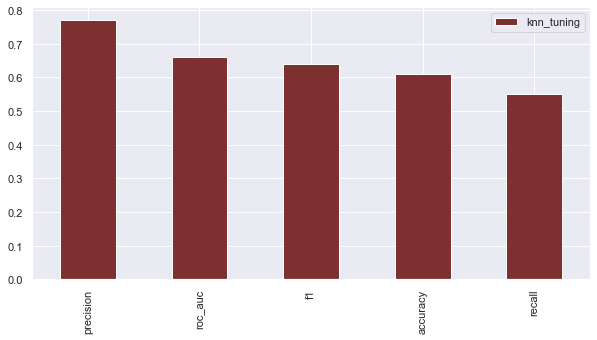

<Figure size 720x720 with 0 Axes>

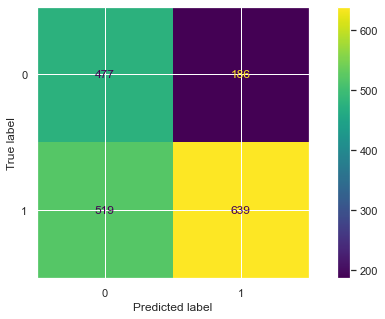

### Grafico de roc: 

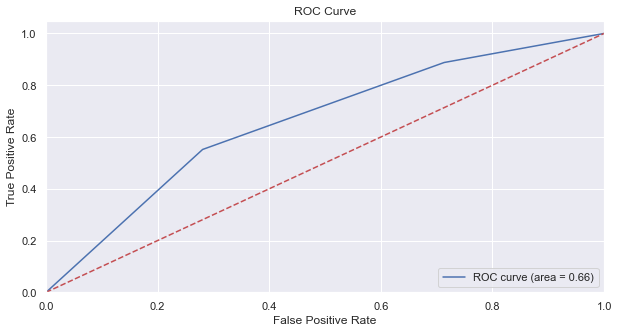

In [110]:
display_and_plot_all_metrics('knn_tuning',clf,X_test,y_test,y_test_pred)

## Oversampling

Como estamos trabajando con una clase desbalanceada, vamos a hacer un over sampling para mitigar el problema.

In [111]:
X_resampled, y_resampled = RandomOverSampler().fit_resample(X_train, y_train)

In [112]:
model = BayesSearchCV(KNeighborsClassifier(),
                      hyperparameters,
                      scoring='precision',
                      n_points= 5,
                      n_iter= 30,
                      cv= 5,
                      verbose = 2,
                      n_jobs=6,
                      random_state= 88)
model.fit(X_resampled, y_resampled)
clf = model.best_estimator_
y_test_pred = pd.Series(clf.predict(X_test), index=X_test.index)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [113]:
# Calculo las metricas de evaluacion
metrics_knn_tuning_oversampling = calculate_metrics('knn_tuning_oversampling', clf,X_test,y_test,y_test_pred)
metrics_knn_tuning_oversampling

,knn_tuning_oversampling
accuracy,0.61
precision,0.77
recall,0.55
f1,0.64
roc_auc,0.65
fpr,"[0.0, 0.28054298642533937, 0.6048265460030166,..."
tpr,"[0.0, 0.5518134715025906, 0.7970639032815199, ..."
thresholds,"[2.0, 1.0, 0.5, 0.0]"


# Metricas: 

### Metricas calculadas

,precision,roc_auc,f1,accuracy,recall
knn_tuning_oversampling,0.77,0.65,0.64,0.61,0.55


### Grafico de confusion matrix: 

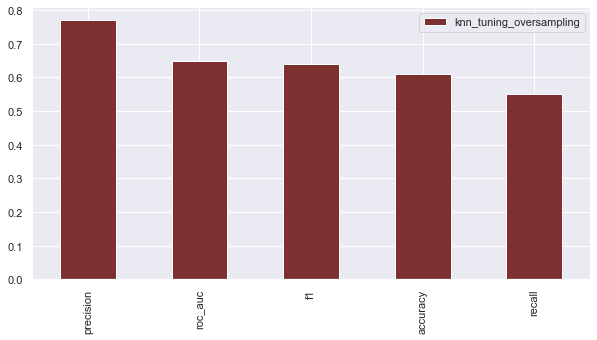

<Figure size 720x720 with 0 Axes>

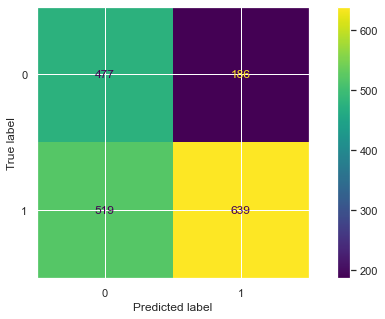

### Grafico de roc: 

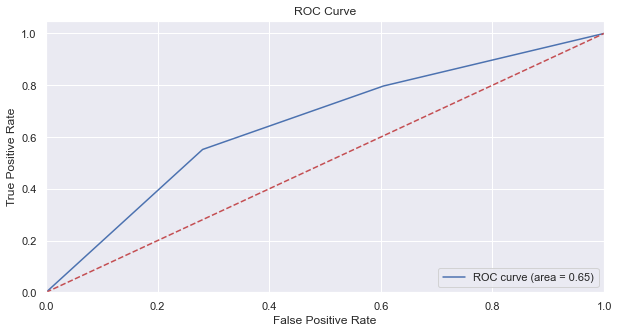

In [114]:
display_and_plot_all_metrics('knn_tuning_oversampling', clf,X_test,y_test,y_test_pred)

In [116]:
#Obtenemos los mejores parametros para el modelo
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 4,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

## Insights

En comparacion al primer entrenamiento el modelo sin tunning arrojaba muchos falsos positivos lo que implicaba que muchos vinos de baja calidad sean calificados como de alta calidad, generando cuando estos se exporten un posible riesgo de perdida de fidelidad de los clientes. Por ese motivo se realizó un optimizacion de parametros con BayesSearchCV buscando mejorar la metrica de precision.

Con BayesSearchCV se mejoro de un 73% a un 77% la metrica de precision además disminuyeron casi a la mitad los falsos positivos.
Aunque logramos aumentar la cantidad de verdadero positivos, también aumento considerablemente la cantidad de falsos negativos. Esto implicaria una perdida de dinero ya que se quería en el mercado local vinos de alta calidad a un precio de baja calidad.

A pesar de que hicimos un over sampling las metricas no mejoraron de hecho fueron identicas al entrenamiento solo con tunning.